In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

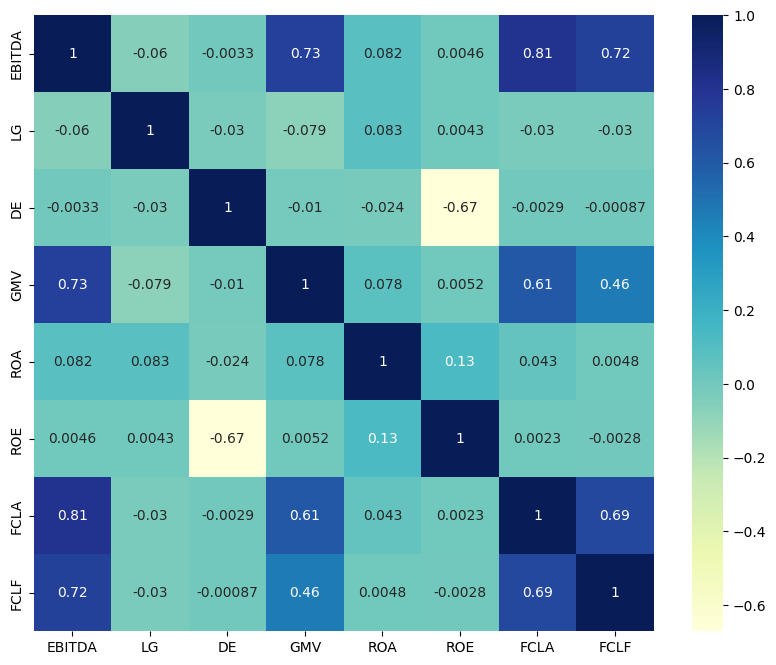

In [2]:
df = pd.read_csv('df_empilhado_final.csv')
df = df.drop(columns=["Unnamed: 0"])

colunas_numericas = df.columns.difference(['Nome', 'Data'])  # Exclui 'Nome' e 'Data'

# Passo 2: Remova vírgulas e converta colunas numéricas para float
for col in colunas_numericas:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


df_corr = df.drop(columns=['Nome', 'Data'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='YlGnBu')


In [3]:
df

,Nome,Data,EBITDA,LG,DE,GMV,ROA,ROE,FCLA,FCLF
0,3tentos,2021-07-01,119436.0,1.6,43.7,4694121.0,2.2,4.7,186785.0,-1108032.0
1,3tentos,2021-10-01,83550.0,1.7,35.8,4807768.0,3.8,7.5,-119487.0,-94868.0
2,3tentos,2022-01-01,54560.0,1.5,55.7,4887747.0,1.1,2.5,-320523.0,-409704.0
3,3tentos,2022-07-01,108988.0,1.4,44.5,5458398.0,2.9,6.5,596343.0,28224.0
4,3tentos,2022-10-01,249174.0,1.4,38.9,4632208.0,3.7,7.9,-249977.0,69746.0
...,...,...,...,...,...,...,...,...,...,...
9056,Zamp S.A.,2023-07-01,78485.0,0.4,86.6,1635318.0,-1.0,-2.9,5425.0,93351.0
9057,Zamp S.A.,2023-10-01,157194.0,0.4,80.1,1520606.0,1.4,4.3,93978.0,441774.0
9058,Zamp S.A.,2024-01-01,38715.0,0.5,136.7,921349.0,-2.0,-6.9,-59692.0,-621912.0
9059,Zamp S.A.,2024-04-01,101653.0,0.5,125.5,1016474.0,-0.6,-2.2,10855.0,172447.0


In [4]:
df = df.sort_values(by=['Nome', 'Data'])

df["g_FCLA"] = df.groupby("Nome")["FCLA"].pct_change()

df = df.dropna(subset=['g_FCLA'])

df_ = df[np.isfinite(df["g_FCLA"])]

if df['g_FCLA'].isnull().all():
    print("A coluna 'g' contém apenas valores ausentes.")

if df is None or df.empty:
    print("df_long não contém dados.")

df = df.dropna(subset=["g_FCLA"])
if len(df) == 0:
    print("Não há dados válidos para 'g' após o dropna.")
df

,Nome,Data,EBITDA,LG,DE,GMV,ROA,ROE,FCLA,FCLF,g_FCLA
1,3tentos,2021-10-01,83550.0,1.7,35.8,4807768.0,3.8,7.5,-119487.0,-94868.0,-1.639703
2,3tentos,2022-01-01,54560.0,1.5,55.7,4887747.0,1.1,2.5,-320523.0,-409704.0,1.682493
3,3tentos,2022-07-01,108988.0,1.4,44.5,5458398.0,2.9,6.5,596343.0,28224.0,-2.860531
4,3tentos,2022-10-01,249174.0,1.4,38.9,4632208.0,3.7,7.9,-249977.0,69746.0,-1.419183
5,3tentos,2023-01-01,122485.0,1.3,44.7,6084219.0,1.6,3.6,69290.0,-51423.0,-1.277186
...,...,...,...,...,...,...,...,...,...,...,...
9056,Zamp S.A.,2023-07-01,78485.0,0.4,86.6,1635318.0,-1.0,-2.9,5425.0,93351.0,-1.128342
9057,Zamp S.A.,2023-10-01,157194.0,0.4,80.1,1520606.0,1.4,4.3,93978.0,441774.0,16.323134
9058,Zamp S.A.,2024-01-01,38715.0,0.5,136.7,921349.0,-2.0,-6.9,-59692.0,-621912.0,-1.635170
9059,Zamp S.A.,2024-04-01,101653.0,0.5,125.5,1016474.0,-0.6,-2.2,10855.0,172447.0,-1.181850


In [5]:
df = df.sort_values(by=['Nome', 'Data'])

df["g_FCLF"] = df.groupby("Nome")["FCLF"].pct_change()

df = df.dropna(subset=['g_FCLF'])

df_ = df[np.isfinite(df["g_FCLF"])]

if df['g_FCLF'].isnull().all():
    print("A coluna 'g' contém apenas valores ausentes.")

if df is None or df.empty:
    print("df_long não contém dados.")

df = df.dropna(subset=["g_FCLF"])
if len(df) == 0:
    print("Não há dados válidos para 'g' após o dropna.")
df

,Nome,Data,EBITDA,LG,DE,GMV,ROA,ROE,FCLA,FCLF,g_FCLA,g_FCLF
2,3tentos,2022-01-01,54560.0,1.5,55.7,4887747.0,1.1,2.5,-320523.0,-409704.0,1.682493,3.318674
3,3tentos,2022-07-01,108988.0,1.4,44.5,5458398.0,2.9,6.5,596343.0,28224.0,-2.860531,-1.068889
4,3tentos,2022-10-01,249174.0,1.4,38.9,4632208.0,3.7,7.9,-249977.0,69746.0,-1.419183,1.471159
5,3tentos,2023-01-01,122485.0,1.3,44.7,6084219.0,1.6,3.6,69290.0,-51423.0,-1.277186,-1.737290
6,3tentos,2023-04-01,53506.0,1.3,45.6,6402037.0,1.2,2.6,-335243.0,-123969.0,-5.838259,1.410770
...,...,...,...,...,...,...,...,...,...,...,...,...
9056,Zamp S.A.,2023-07-01,78485.0,0.4,86.6,1635318.0,-1.0,-2.9,5425.0,93351.0,-1.128342,-2.452437
9057,Zamp S.A.,2023-10-01,157194.0,0.4,80.1,1520606.0,1.4,4.3,93978.0,441774.0,16.323134,3.732397
9058,Zamp S.A.,2024-01-01,38715.0,0.5,136.7,921349.0,-2.0,-6.9,-59692.0,-621912.0,-1.635170,-2.407761
9059,Zamp S.A.,2024-04-01,101653.0,0.5,125.5,1016474.0,-0.6,-2.2,10855.0,172447.0,-1.181850,-1.277285


In [6]:
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = df[np.isfinite(df["FCLF"])]
# Ignorar Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

features = ['FCLF']

df['Data'] = pd.to_datetime(df['Data'])  # Converter para datetime



def expanding_window_knn(df, k=4): #melhor fit k = 1
    results = []
    maes, rmses = [], []
    start_time = time.time()

    #medias dos g
    media_g = df['FCLF'].mean()
    dp_g = df['FCLF'].std()

    for empresa in df['Nome'].unique():
        df_empresa = df[df['Nome'] == empresa].sort_values(by='Data').reset_index(drop=True)
        
        if len(df_empresa) < k:
            continue  # Ignora empresas com menos de k registros
        
        X, y = [], []
        scaler = MinMaxScaler()
        
        y_real_list, y_pred_list = [], []
        
        for i in range(len(df_empresa)):
            if i < k:
                continue
            
            X_train = df_empresa['FCLF'].iloc[:i].values.reshape(-1, 1)

            if not np.all(np.isfinite(X_train)):
                continue  # Pula esse loop se houver problemas

            y_train = df_empresa['FCLF'].iloc[:i].values
            X_test = df_empresa['FCLF'].iloc[i].reshape(-1, 1)
              
            
            # Normalizar os dados
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test.reshape(-1, 1))
            
            # Criar e treinar o modelo
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train, y_train)
            
            # Fazer a previsão
            y_pred = knn.predict(X_test)[0]
            y_real = df_empresa['FCLF'].iloc[i]
            erro_abs = abs(y_real - y_pred)
            
            results.append([empresa, df_empresa['Data'].iloc[i], y_real, y_pred, erro_abs])
            
            y_real_list.append(y_real)
            y_pred_list.append(y_pred)

        
        # Calcular métricas apenas se houver previsões
        if len(y_real_list) > 0 and len(y_pred_list) > 0:
            mae = mean_absolute_error(y_real_list, y_pred_list)
            rmse = mean_squared_error(y_real_list, y_pred_list, squared=False)
            maes.append(mae)
            rmses.append(rmse)
            r2 = r2_score(y_real_list, y_pred_list)

            X_train_final = df_empresa['FCLF'].iloc[:-1].values.reshape(-1, 1)
            y_train_final = df_empresa['FCLF'].iloc[:-1].values
            X_test_final = df_empresa['FCLF'].iloc[-1].reshape(-1, 1)
            y_test_final = df_empresa['FCLF'].iloc[-1]
            
            X_train_final = scaler.fit_transform(X_train_final)
            X_test_final = scaler.transform(X_test_final)
            
            knn.fit(X_train_final, y_train_final)
            train_mse = mean_squared_error(y_train_final, knn.predict(X_train_final))
            test_mse = mean_squared_error([y_test_final], knn.predict(X_test_final))  # Corrigido
            divd = (train_mse/test_mse)
    
    total_time = time.time() - start_time

    
    
    # Criar um DataFrame com os resultados
    df_results = pd.DataFrame(results, columns=['Empresa', 'Data', 'Real', 'Previsto', 'Erro Absoluto'])
    
    # Salvar como CSV
    df_results.to_csv('previsoes_knn.csv', index=False)
    print("Arquivo 'previsoes_knn.csv' salvo com sucesso!")
    print(f"Tempo total de computação: {total_time:.2f} segundos")
    if len(maes) > 0 and len(rmses) > 0:
        print(f"MAE: {mae}")
        print(f"RMSE: {rmse}")
    else:
        print("Não foi possível calcular MAE e RMSE devido à falta de previsões válidas.")
    print(f'R2 da regressão: {r2}')
    print(f"MSE no Treino: {train_mse:.2f}")
    print(f"MSE no Teste: {test_mse:.2f}")
    print(f'Div do MSE no treino/teste: {divd:.2f}')
    print(f'Med G: {media_g:.2f}')
    print(f'DP G: {dp_g:.2f}')
    print(f'RMSE como % da média: {(rmse/media_g)*100:.2f}%')
    print(f'RMSE como % do DP: {(rmse/dp_g)*100:.2f}%')
    

# Executar a função
expanding_window_knn(df)


C:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Arquivo 'previsoes_knn.csv' salvo com sucesso!
Tempo total de computação: 9.40 segundos
MAE: 78003.40909090909
RMSE: 135505.44298561322
R2 da regressão: 0.6908082680516914
MSE no Treino: 4082872374.51
MSE no Teste: 3387298200.25
Div do MSE no treino/teste: 1.21
Med G: 262336.08
DP G: 3370332.37
RMSE como % da média: 51.65%
RMSE como % do DP: 4.02%


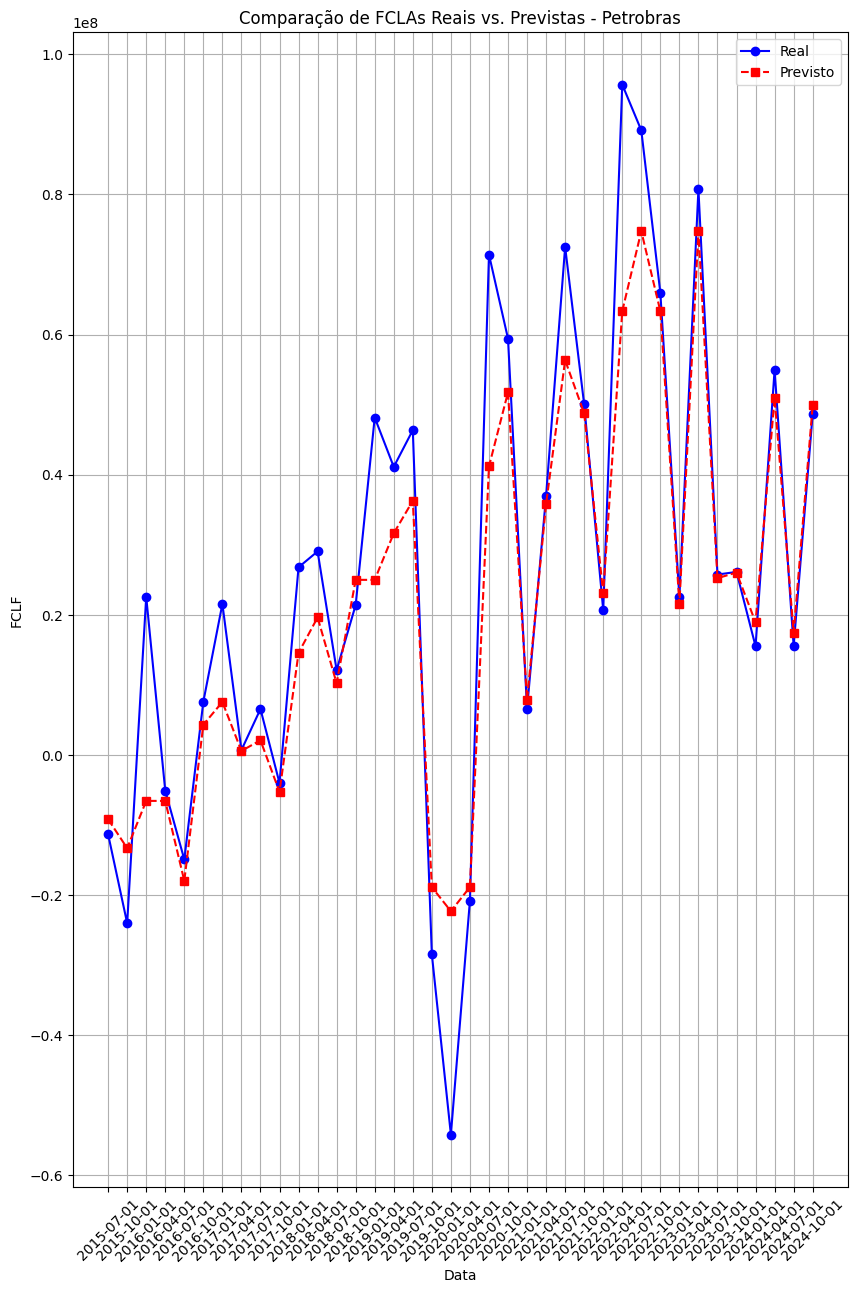

In [7]:

results_df = pd.read_csv('previsoes_knn.csv')
empresa_selecionada = 'Petrobras'
df_selecionado = results_df[results_df["Empresa"] == empresa_selecionada]

plt.figure(figsize=(10,15))
plt.plot(df_selecionado["Data"], df_selecionado["Real"], label="Real", marker='o', linestyle='solid', color="blue")
plt.plot(df_selecionado["Data"], df_selecionado["Previsto"], label="Previsto", marker='s', linestyle='dashed', color="red")

plt.xlabel("Data")
plt.ylabel("FCLF")
plt.title(f"Comparação de FCLAs Reais vs. Previstas - {empresa_selecionada}")
plt.legend()
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(True)

plt.show()

In [38]:
for company in df['Nome'].unique():
    company_data = df[df['Nome'] == company]
    
    if len(company_data) < 5:  # Pula empresas com poucos dados
        continue
    
    # Separação temporal (70% treino, 30% teste)
    split_idx = int(0.8 * len(company_data))
    train = company_data.iloc[:split_idx]
    test = company_data.iloc[split_idx:]
    
    X_train = train[features]
    y_train = train['FCLF']
    X_test = test[features]
    y_test = test['FCLF']
    
    # Modelo KNN (k ajustado dinamicamente)
    k = min(4, len(X_train))  # Garante que k <= amostras de treino
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Métricas de Treino e Teste
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Diagnóstico
    if r2_train > 0.7 and r2_test < 0.5:
        fit_status = "⚠️ OVERFITTING (treino bom, teste ruim)"
    elif r2_train < 0.5 and r2_test < 0.5:
        fit_status = "⚠️ UNDERFITTING (treino e teste ruins)"
    else:
        fit_status = "✅ BOM FIT (treino e teste consistentes)"
    
    print(f"\n🔍 Análise para {company} (k={k}):")
    print(f"R² Treino = {r2_train:.2f} | R² Teste = {r2_test:.2f}")
    print(f"RMSE Treino = {rmse_train:.0f} | RMSE Teste = {rmse_test:.0f}")
    print(fit_status)


🔍 Análise para 3tentos (k=4):
R² Treino = 0.68 | R² Teste = 0.53
RMSE Treino = 85050 | RMSE Teste = 205498
✅ BOM FIT (treino e teste consistentes)

🔍 Análise para Aco Altona (k=4):
R² Treino = 0.95 | R² Teste = 0.96
RMSE Treino = 3985 | RMSE Teste = 2418
✅ BOM FIT (treino e teste consistentes)

🔍 Análise para Aeris (k=4):
R² Treino = 0.76 | R² Teste = 0.34
RMSE Treino = 97481 | RMSE Teste = 124559
⚠️ OVERFITTING (treino bom, teste ruim)

🔍 Análise para Afluente T (k=4):
R² Treino = 0.95 | R² Teste = 0.94
RMSE Treino = 3391 | RMSE Teste = 3912
✅ BOM FIT (treino e teste consistentes)

🔍 Análise para Agrogalaxy (k=4):
R² Treino = 0.62 | R² Teste = 0.40
RMSE Treino = 277709 | RMSE Teste = 299725
✅ BOM FIT (treino e teste consistentes)

🔍 Análise para Alfa Holding (k=4):
R² Treino = 0.94 | R² Teste = -0.32
RMSE Treino = 1255 | RMSE Teste = 19082
⚠️ OVERFITTING (treino bom, teste ruim)

🔍 Análise para Alliar (k=4):
R² Treino = 0.86 | R² Teste = 0.87
RMSE Treino = 22569 | RMSE Teste = 19419


C:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



🔍 Análise para Eneva (k=4):
R² Treino = 0.87 | R² Teste = 0.71
RMSE Treino = 230076 | RMSE Teste = 725148
✅ BOM FIT (treino e teste consistentes)

🔍 Análise para Engie Brasil (k=4):
R² Treino = 0.92 | R² Teste = 0.97
RMSE Treino = 270670 | RMSE Teste = 229594
✅ BOM FIT (treino e teste consistentes)

🔍 Análise para Enjoei (k=4):
R² Treino = 0.58 | R² Teste = -0.39
RMSE Treino = 5338 | RMSE Teste = 3751
✅ BOM FIT (treino e teste consistentes)

🔍 Análise para Eqtl Maranhao (k=4):
R² Treino = 0.98 | R² Teste = 0.95
RMSE Treino = 51967 | RMSE Teste = 54328
✅ BOM FIT (treino e teste consistentes)

🔍 Análise para Eqtl Para (k=4):
R² Treino = 0.97 | R² Teste = 0.84
RMSE Treino = 63159 | RMSE Teste = 192824
✅ BOM FIT (treino e teste consistentes)

🔍 Análise para Equatorial (k=4):
R² Treino = 0.91 | R² Teste = 0.36
RMSE Treino = 233874 | RMSE Teste = 3506294
⚠️ OVERFITTING (treino bom, teste ruim)

🔍 Análise para Espacolaser (k=4):
R² Treino = 0.94 | R² Teste = 0.69
RMSE Treino = 34422 | RMSE T